### Task 1

Экспоненциальное распределение:
Математическое ожидание:  0.999441606864012
Дисперсия:  0.9987654135475542
Среднеквадратичное отклонение: 0.9993825161306127

Доверительная вероятность == 0.99
Доверительный интервал Мат. ожидания:  0.9921 < mu <  1.0068
Доверительный интервал среднеквадратичного отклонения:  0.9937 < sigma <  1.0052

chi-square test
result = 9.940817719002217
critical value = 246.09465845289168
9.940817719002217 < 246.09465845289168; pass


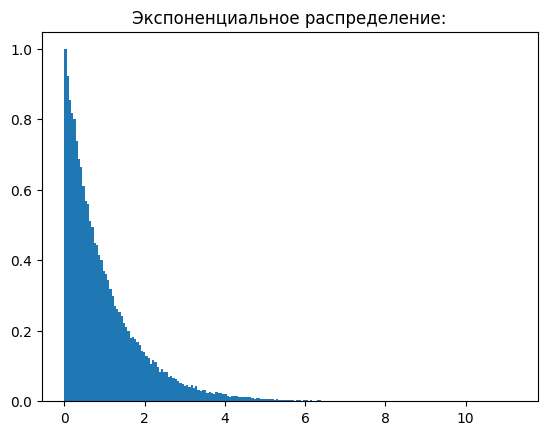

In [4]:
import math
import numpy as np
from matplotlib import pyplot
from numpy import mean, var, std
from scipy import stats
from collections import Counter, OrderedDict
import random
from pprint import pprint
import random
import scipy.special


def get_interval_mu(gamma, mu, sigma, n):
    t = stats.t.ppf(gamma, n - 1)
    delta = t * sigma / np.sqrt(n)
    return mu - delta, mu + delta

def get_interval_sigma(gamma, sigma, n):
    alpha1 = (1 - gamma) / 2.0
    alpha2 = (1 + gamma) / 2.0
    right_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha1, n - 1)) * sigma
    left_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha2, n - 1)) * sigma
    return left_border, right_border

def chi_square_test(observed, expected, alpha, dof):
    result = 0.0
    for i in range(len(observed)):
        result += (expected[i] - observed[i]) ** 2 / float(expected[i])
    result *= len(observed)
    critical_value = stats.chi2.ppf(1 - alpha, dof)
    print(f'chi-square test')
    print(f'result = {result}')
    print(f'critical value = {critical_value}')
    if result < critical_value:
        print(f'{result} < {critical_value}; pass')
    else:
        print(f'{result} > {critical_value}; fail')
    return result, result < critical_value

def exponential_numbers(L, size):
    numbers = [random.random() for _ in range(size)]
    array = []
    for num in numbers:
        if 1 - num > 0:
            array.append(((-1) / L) * (math.log(1 - num)))
    return array

def exponential_f(l, x):
    return l * np.exp(-l * x)

def get_exponential_expected(size, l, arguments):
    expected = []
    for i in range(size):
        expected.append(exponential_f(l, arguments[i]))
    return expected

def exponential_distribution():
    L = 1
    size = 10 ** 5
    exp = exponential_numbers(L, size)
    exp_m = mean(exp)
    exp_v = var(exp)
    exp_s = std(exp)
    probabilities, intervals, _ = pyplot.hist(exp, bins=200, density=True)
    intervals = intervals[1:]
    expected = get_exponential_expected(len(probabilities), L, intervals)
    pyplot.title("Экспоненциальное распределение:")
    print("Экспоненциальное распределение:")
    print("Математическое ожидание: ", exp_m)
    print("Дисперсия: ", exp_v)
    print(f"Среднеквадратичное отклонение: {exp_s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, exp_m, exp_s, size)
    print(f'Доверительный интервал Мат. ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, exp_s, size)
    print(f'Доверительный интервал среднеквадратичного отклонения: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(probabilities, expected, 0.01, len(intervals) - 3)
    pyplot.show()

exponential_distribution()



### Task 2(16)

Хи-квадрат

Хи-квадрат дискретное распределение:
Математическое ожидание:  3.2215004568979384
Дисперсия:  6.244423790793964
Среднеквадратичное отклонение: 2.49888450929489

Доверительная вероятность == 0.99
Доверительный интервал математического ожидания:  3.2157 < mu <  3.2273
Доверительный интервал среднеквадратичного отклонения:  2.4943 < sigma <  2.5034

chi-square test
result = 9.254105536843744
critical value = 18.475306906582357
9.254105536843744 < 18.475306906582357; pass


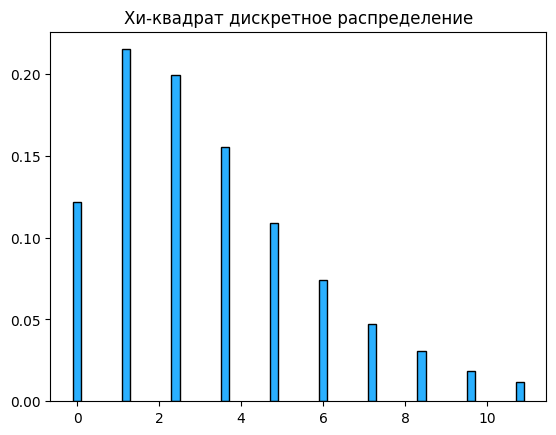

In [5]:
def get_chi_intervals(a, b, n, v):
    if v <= 0 or not isinstance(v, int):
        raise ValueError('v parameter must be positive integer')
    points = {}
    for i in range(n):
        x_i = a + i * (b - a) / n
        x_i2 = a + (i + 1) * (b - a) / n
        y = scipy.special.gammainc(v/2, x_i / 2)
        y_2 = scipy.special.gammainc(v/2, x_i2 / 2)
        points[x_i] = y_2 - y
    return points

def get_chi_values(a, b, n, v, intervals):
    x = [random.random()  for _ in range(n)]
    arguments = list(intervals.keys())
    arguments.sort()
    res = []
    for i in range(len(x)):
        generated_number =  x[i]
        s = 0 
        for j in range(len(arguments)):
            s += intervals[arguments[j]]
            if  generated_number < s:
                res.append(arguments[j])
                break
    return res

def chi_distribution():
    a, b, v_param = 0, 12, 4
    discrete_size, size = 10, 10**6
    intervals = get_chi_intervals(a, b, discrete_size, v_param)
    numbers = get_chi_values(a, b, size, v_param, intervals)
    m = mean(numbers)
    v = var(numbers)
    s = std(numbers)
    observed_values = OrderedDict({k: v / size for k, v in Counter(numbers).items()})
    pyplot.bar(
        observed_values.keys(),
        observed_values.values(),
        facecolor='#2ab0ff',
        edgecolor='#000000',
        width=2 / discrete_size
    )
    expected = list(intervals.values())
    pyplot.title("Хи-квадрат дискретное распределение")
    print("Хи-квадрат дискретное распределение:")
    print("Математическое ожидание: ", m)
    print("Дисперсия: ", v)
    print(f"Среднеквадратичное отклонение: {s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, m, s, size)
    print(f'Доверительный интервал математического ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, s, size)
    print(f'Доверительный интервал среднеквадратичного отклонения: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(list(observed_values.values()), expected, 0.01, len(observed_values) - 3)
    pyplot.show()

chi_distribution()